In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

 Write a code to do polynomial regression with quadratic regularization that takes degree d and regularization parameter λ as input.

In [ ]:
# Cell type : CodeWrite
# write the function for Polynomial regression with quadratic regularization here.
import pandas as pd
train_filename = pd.read_csv('/content/bayes_variance_data.csv')
train_data = np.array(train_filename)

def polyregression(Data,lambda_l,degree):
    """ Build the regression model """
    train_X = Data[:,0]
    train_Y = Data[:,1]
    design_matrix = []
    total_error = []
    index_error = 1
    max_degree = degree
    lmbda = lambda_l
    design_matrix = np.asarray([[np.power(train_X[i], j) for j in range(max_degree+1)] for i in range(len(train_X))])
    (n,d) = design_matrix.shape
    weights = np.linalg.pinv(np.transpose(design_matrix) @ design_matrix + lmbda*np.identity(d)) @ (np.transpose(design_matrix))@ train_Y;


    # Arguments:
    # Data: Dataset
    # Lambda: regularization parameter
    # Degree: Degree of the polynomial

    # output: weights

    return weights



weights = polyregression(train_data,0.1,10)
weights

array([  6.34090815, -11.00847559,   2.3937129 ,   3.1843639 ,
         1.82591291,   0.61922783,  -0.1383099 ,  -0.53244579,
        -0.68611679,  -0.69528542,  -0.62518865])

4c) Run the code for degree $d=24$ and each $\lambda$ in the set:
\[\{10^{-15}, 10^{-9}, 10^{-6}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10^{1}, 10^{2}, 10^{3}, 10^{6}, 10^{9}, 10^{15}\}\]

  i) Perform 5-fold cross-validation on the 100 data points (20 datapoints in each fold). For each fold, compute both training and validation errors using the mean squared error loss function. \\
  ii) Calculate the average training and validation errors across the 5 folds.

In [ ]:
def KFold_Poly(Data,degree, lambda_values, num_folds):
    """ Split data for training and testing. Then train the model """
    """ Use the trained model to make predictions for test data """

    # Arguments: Dataset

    # output: Training_score, Validation_score
    X = Data[:,0]
    y = Data[:,1]
    m = len(y)
    fold_size = m // num_folds
    errors = []
    for lmbda in lambda_values:
        fold_errors = []

        for i in range(num_folds):
            start, end = i * fold_size, (i + 1) * fold_size
            X_train = np.concatenate((X[:start], X[end:]), axis=0)
            y_train = np.concatenate((y[:start], y[end:]), axis=0)
            X_val = X[start:end]
            y_val = y[start:end]
            # print(X_train.shape)

            X_train_poly = np.asarray([[np.power(X_train[i], j) for j in range(degree+1)] for i in range(len(X_train))])
            X_val_poly =  np.asarray([[np.power(X_val[i], j) for j in range(degree+1)] for i in range(len(X_val))])

            (n,d) = X_train_poly.shape

            weights = np.linalg.pinv(np.transpose(X_train_poly) @ X_train_poly + lmbda*np.identity(d)) @ (np.transpose(X_train_poly))@ y_train;

            Y_predict = X_train_poly@ weights
            Y_val_predict = X_val_poly@weights
            train_error = np.sum((y_train - Y_predict) * (y_train - Y_predict))/n
            val_error = np.sum((y_val - Y_val_predict) * (y_val - Y_val_predict))/20
            fold_errors.append((train_error, val_error))

        errors.append(fold_errors)
    # print(len(errors))
    errors= np.array(errors)
    # print(errors)
    Training_score,Validation_score = errors[:,:,0], errors[:,:,1]
    # return np.array(errors)
    return Training_score, Validation_score
lambda_values = [10**(-15), 10**(-9), 10**(-6), 10**(-3),10**(-2), 10**(-1),10,10**(2),10**3,10**6, 10**9, 10**15]
error1,error2 = KFold_Poly(train_data,24, lambda_values, 5)

for i in range(5):
  print('training and validation errors using the mean squared error loss function for fold k={}'.format(i))
  data = {'log10(lambda)': np.log10(np.array(lambda_values)), 'KFold_Train_error': error1[:,0], 'KFold_Val_error': error2[:,0]}
  df = pd.DataFrame(data=data)
  print(df)
  print()
data = {'log10(lambda)': np.log10(np.array(lambda_values)), 'Avg_Train_error': np.mean(error1,axis=1), 'Avg_Val_error': np.mean(error2,axis=1)}
df = pd.DataFrame(data=data)
print( 'average training and validation errors across the 5 folds')
print(df)


training and validation errors using the mean squared error loss function for fold k=0
    log10(lambda)  KFold_Train_error  KFold_Val_error
0           -15.0           0.942325         1.418180
1            -9.0           0.944035         1.292595
2            -6.0           0.945132         1.290025
3            -3.0           1.031598         1.215968
4            -2.0           1.131521         1.181998
5            -1.0           1.371101         1.289596
6             1.0           3.133864         3.149267
7             2.0           6.853500         6.203499
8             3.0          11.079689         9.913421
9             6.0          12.288810        11.067027
10            9.0          12.290220        11.068392
11           15.0          12.290221        11.068393

training and validation errors using the mean squared error loss function for fold k=1
    log10(lambda)  KFold_Train_error  KFold_Val_error
0           -15.0           0.942325         1.418180
1            -9

4d)  Construct a learning curve by plotting the average training and validation errors against the model complexity ($\log_{10} \lambda$). Based on this learning curve, identify the (i) model with the highest bias, (ii) model with the highest variance?, and (iii) the model that will work best on some unseen data.

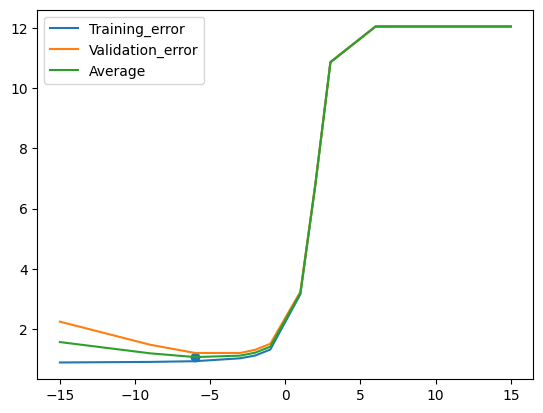

model with the highest bias is when lambda = 1000000000000000.0, and d = 24
model with the highest variance is when lambda = 1e-15, and d = 24
the model that will work best on some unseen data is when lambda = 1e-06, and d = 24


In [ ]:
# Cell type : CodeWrite
# Write the cod for plotting.

avg = (np.mean(error1,axis=1)+np.mean(error2,axis=1))/2
np.argmin(avg)

plt.plot(np.log10(np.array(lambda_values)),np.mean(error1,axis=1), label = 'Training_error')
plt.plot(np.log10(np.array(lambda_values)),np.mean(error2,axis=1), label = 'Validation_error')
plt.plot(np.log10(np.array(lambda_values)),avg, label = 'Average')
plt.scatter(np.log10(np.array(lambda_values))[np.argmin(avg)], avg[np.argmin(avg)] )
plt.legend()
plt.show()

print('model with the highest bias is when lambda = {}, and d = {}'.format(1e15,24))
print('model with the highest variance is when lambda = {}, and d = {}'.format(10**(-15),24))
print('the model that will work best on some unseen data is when lambda = {}, and d = {}'.format(lambda_values[np.argmin(avg)],24))

4e) Plot the fitted curve to the given data ($\hat{y}$ against $x$) for the three models reported in part (e).

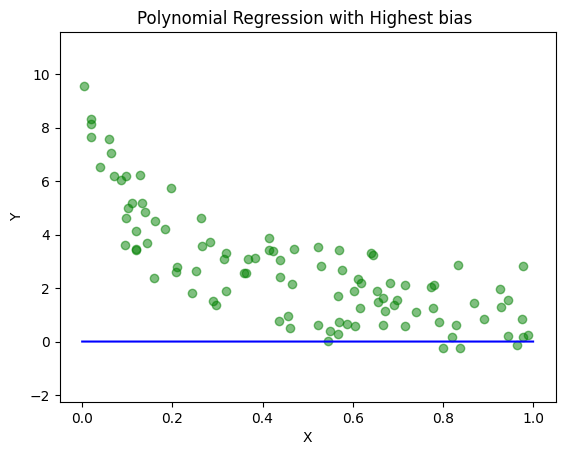

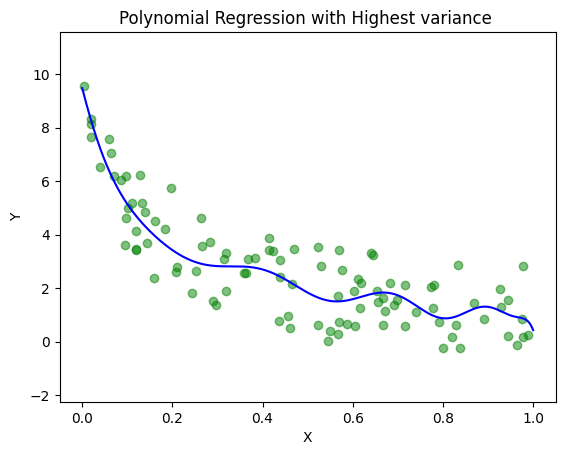

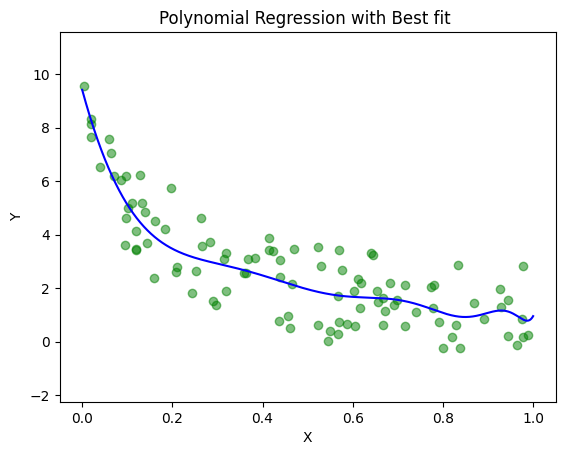

In [ ]:
# Cell type : CodeWrite
# Write the cod for plotting.
lst = [ 'Highest bias', 'Highest variance', 'Best fit']
j =0
for i in [-1,0,2]:
  weights=polyregression(train_data,lambda_values[i],24)
  X_axis = np.linspace(0,1,10000)
  train_X = train_data[:,0]
  train_Y = train_data[:,1]

  design_matrix_axis = np.asarray([[np.power(X_axis[i], j) for j in range(24+1)] for i in range(len(X_axis))])
  Y_axis = design_matrix_axis @ weights
  plt.scatter(train_X, train_Y, color='green', alpha=0.5)
  # plt.scatter(val_X, val_Y, color='red', alpha=0.5)
  plt.plot(X_axis, Y_axis, color='blue')
  plt.ylim(min(train_Y)-2, max(train_Y)+2)
  plt.title('Polynomial Regression with {} '.format(lst[j]))
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()
  j+=1